In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils import mnist_reader
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Problem 1

## 1d)

In [2]:
def sign(a): 
    return 1 if a>=0 else -1

W1 = [4,3, 1, -2]
W2 = [0,-1, -3, -3]
C =[2, 2, 4, 1]

X1 = [4,1,0,-2,-2,1,5,3]
X2 = [0,1,1,-2,1,0,2,0]
Y_ACT = [1,-1,-1,1,-1,1,-1,-1]

In [3]:
#classic perceptrion
y_pred = []
err = []
w1, w2 = -2, -3
for x1,x2,y_act in zip(X1,X2,Y_ACT):
    pred = sign(w1*x1 + w2*x2)
    y_pred.append(pred)
    error = 1 if pred != y_act else 0
    err.append(error)
print(y_pred)
print(err)



[-1, -1, -1, 1, 1, -1, -1, -1]
[1, 0, 0, 0, 1, 1, 0, 0]


In [4]:
# voting algorithm
y_pred = []
err = []
for x1,x2,y_act in zip(X1,X2,Y_ACT):
    pred = 0
    for w1,w2,c in zip(W1,W2,C):
        pred += c * sign(x1*w1 + x2*w2)
    pred = sign(pred)
    y_pred.append(pred)
    error = 1 if pred != y_act else 0
    err.append(error)
print(y_pred)
print(err)

[1, -1, -1, 1, -1, 1, -1, 1]
[0, 0, 0, 0, 0, 0, 0, 1]


In [5]:
# averaging algorithm
y_pred = []
err = []
aw1, aw2 = 0,0
for w1,w2,c in zip(W1, W2, C):
    aw1 += c*w1
    aw2 += c*w2
for x1,x2,y_act in zip(X1,X2,Y_ACT):
    pred = sign(aw1*x1 + aw2*x2)
    y_pred.append(pred)
    error = 1 if pred != y_act else 0
    err.append(error)


print(y_pred)
print(err)


[1, -1, -1, 1, -1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 1, 1]


# Problem 4: Binary Classification

Please follow our instructions in the same order to solve the binary classification problem.
Please print out the entire results and codes when completed.

In [6]:
#X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
#X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


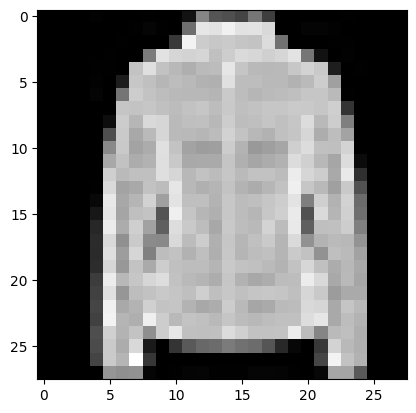

label is Shirt


In [7]:
# PART (a): 
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] == 1:
    label = 'Dress'
else:
    label = 'Shirt'
print('label is', label)

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

In [8]:
# PART (b),(c): 
# Implement the perceptron Algorithm and compute the number of mis-classified point
N = X_train.shape[0] # Number of data point train
N_test = X_test.shape[0] # Number of data point test
d = X_train.shape[1] # Number of features
loss_hist = []
W = np.zeros((d+1,1))
X_train_h = np.hstack((np.ones((N,1)), X_train))
X_test_h = np.hstack((np.ones((N_test,1)), X_test))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test accuracy in the same plot
# for m range from 1 to N
# ================================================================ #


# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

In [9]:
# b) running the perceptron algorithm and summary of results
loss_hist = []
W_ = W.ravel()
for iter in range(1, N+1):
    errs = 0
    for i in range(N):
        x = X_train_h[i]
        # print(x.shape)
        y = y_train[i][0]
        a = np.dot(W_, x)
        if y*a <= 0: 
            errs += 1 
            W_ = W_ + y*x
    loss_hist.append(errs/N)


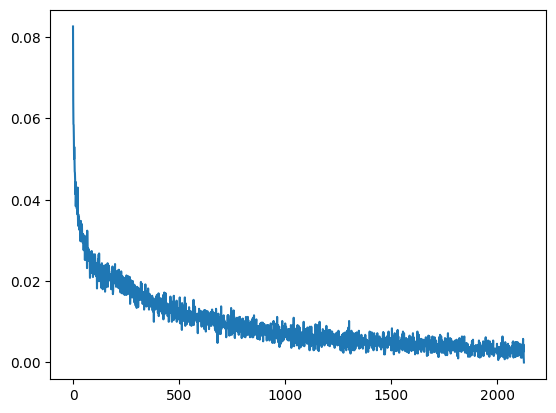

final loss value : 0.0
value of $$||w||^2_2$$ : 659979038983.0
percent test error : 9.0%


In [10]:
plt.plot(loss_hist)
plt.show()
print("final loss value :", loss_hist[-1])
print(f"value of $$||w||^2_2$$ : {np.dot(W_,W_)}")

# c) Test data
errs = 0
for i in range(N_test):
    x = X_test_h[i]
    y = y_test[i][0]
    a = np.dot(W_,x)
    if y*a <= 0:
        errs += 1
print(f"percent test error : {errs/N_test:.1%}")

## Train Logistic Regression
In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent.

In [11]:
from codes.Logistic import Logistic

In [12]:
## PART (f): 
X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 0.6931471805599454
188442.90860327004


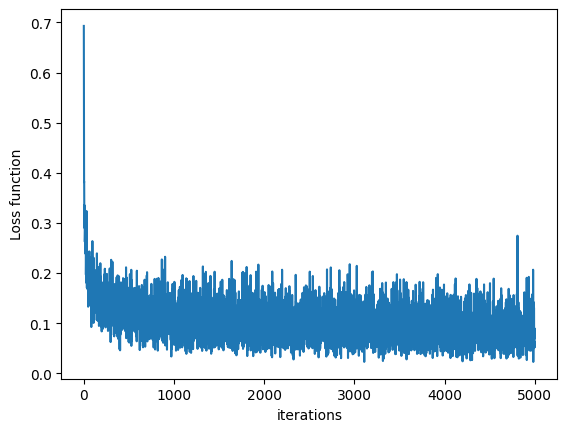

Weight squared norm 0.00028564417990463485
Final loss 0.08745089913972777


In [13]:
## PART (g):
## Complete train_LR function in Logisitc.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=100, num_iters=5000)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/LR_loss_hist.pdf')
print('Weight squared norm',np.linalg.norm(w,ord=2)**2)
print('Final loss',loss_history[-1])

In [14]:
# PART (h)
# Complete predict function in Logisitc.py file and compute the percentage of mis-classified points
y_pred = logistic.predict(X_test)
test_err = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err,'%')

4.8 %


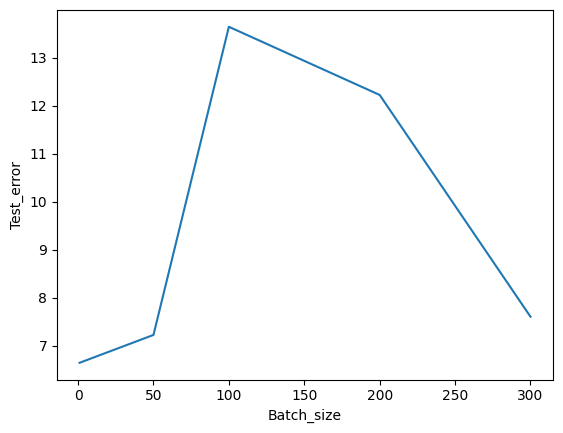

In [15]:
## PART (i): 
Batch = [1, 50 , 100, 200, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size. Avergae the test error over 10 times
# ================================================================ #
n_times = 10
for i in range(len(Batch)):
    curr_acc = 0
    for _ in range(n_times):
        logistic = Logistic(d=d, reg_param=0)
        logistic.train_LR(X_train,y_train, eta=1e-5,batch_size=Batch[i], num_iters=(6000/Batch[i]))
        y_pred = logistic.predict(X_test)
        err = np.sum((y_test!=y_pred))*100/X_test.shape[0]
        curr_acc += err
    test_err[i,0] = curr_acc/n_times


# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

# Problem 5: Linear Regression
Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [16]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test= get_data()  


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)


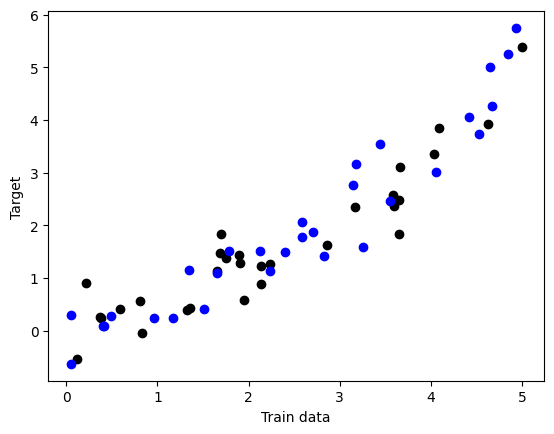

In [17]:
## PART (a): 
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.show()

## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [18]:
from codes.Regression import Regression

In [19]:
## PART (c): 
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

Loss value 4.282380633012861
Gradient value [[ -3.19217252]
 [-10.44504584]]


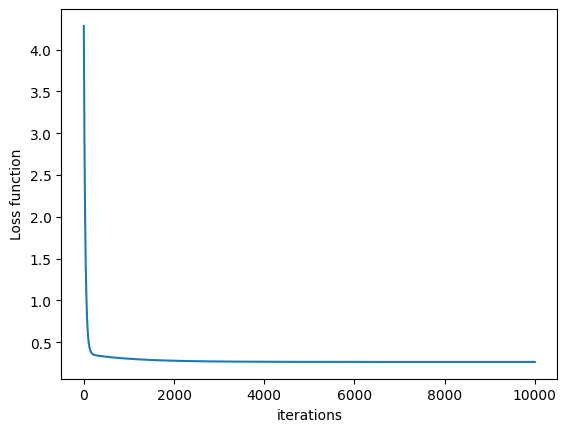

[[-0.37469204]
 [ 0.88377017]]
Final loss: 0.2641846537670641


In [20]:
## PART (d): 
## Complete train_LR function in Regression.py file 
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=30, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print('Final loss:',loss_history[-1])

In [21]:
from codes.Regression import Regression

|lr 	|loss
|0.1	|11.5639532320648
|0.01	|11.563953232064865
|0.001	|11.592156097166749
|0.0001	|15.090270051498766


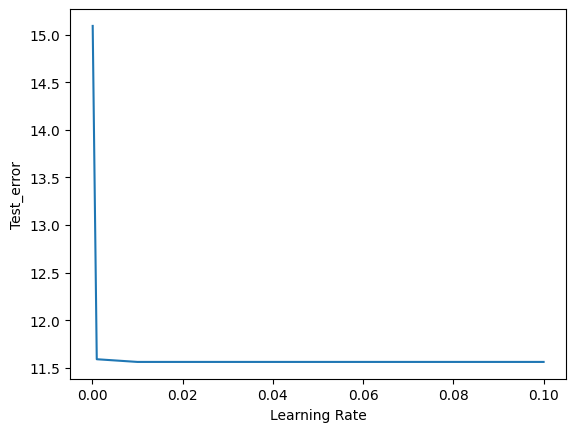

In [22]:
## PART (d) (Different Learning Rates):
from numpy.linalg import norm
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
test_err = np.zeros((len(lrs),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different learning rates and average the test error over 10 times
# ================================================================ #
print("|lr \t|loss")
for i in range(len(lrs)):
    regression = Regression(m=1, reg_param=0)
    regression.train_LR(X_train, y_train, eta=lrs[i], batch_size=30, num_iters=10000)
    yt_pred = regression.predict(X_test)
    loss = np.sum(np.power(yt_pred - y_test,2))
    test_err[i] = loss
    print(f"|{lrs[i]}\t|{loss}")
    
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(lrs,test_err)
plt.xlabel('Learning Rate')
plt.ylabel('Test_error')

plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

In [23]:
## PART (e): 
## Complete closed_form function in Regression.py file
regression = Regression(m=1, reg_param=0)
loss_2, w_2 = regression.closed_form(X_train, y_train)
print('Optimal solution loss',loss_2)
print('Optimal solution gradient',w_2)


Optimal solution loss 0.2641793820396444
Optimal solution gradient [[-0.37906992]
 [ 0.8852483 ]]


In [24]:
y_pred = regression.predict(X_test)
loss_test = np.sum(np.power(y_pred - y_test, 2))
loss_test

11.56395323206481

|power 	|train loss		|test loss		|
|1	|0.2641793820396444	|0.38546510773549364	|
|2	|0.18253786843631914	|0.25101632068300295	|
|3	|0.15938695015088816	|0.22269398267469395	|
|4	|0.15893653603229524	|0.21710012747579743	|
|5	|0.158296983304175	|0.22448356099567499	|
|6	|0.15824520606563205	|0.22663770073197484	|
|7	|0.133306577453165	|0.32538786594574803	|
|8	|0.12905252904961148	|0.3241498972813488	|
|9	|0.11292062753617588	|0.46733887487009235	|
|10	|0.10525669186878818	|0.6266767250392092	|


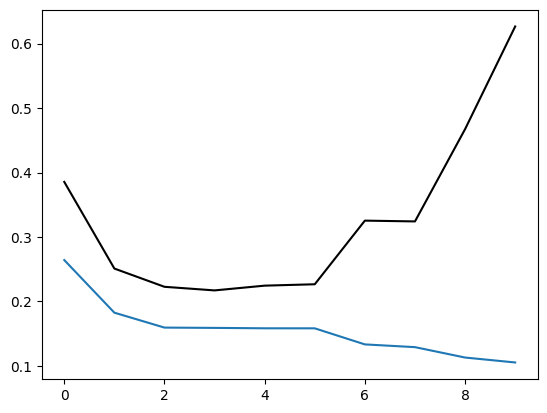

In [25]:
## PART (g): 
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
print("|power \t|train loss\t\t|test loss\t\t|")
for i in range(0,10):
    regression = Regression(m=(i+1), reg_param=0)
    loss_train, w = regression.closed_form(X_train, y_train)
    
    y_pred = regression.predict(X_test)
    loss_test = np.sum(np.power(y_pred - y_test, 2))/len(y_test)
    
    train_loss[i] = loss_train
    test_loss[i] = loss_test
    print(f"|{i+1}\t|{loss_train}\t|{loss_test}\t|")
    

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.plot(train_loss)
plt.plot(test_loss, color='black')
plt.show()

In [26]:
print(w)

[[-1.02037003e+00]
 [ 3.23393161e+00]
 [ 2.68711219e+01]
 [-1.20522667e+02]
 [ 1.96517577e+02]
 [-1.67332412e+02]
 [ 8.33228097e+01]
 [-2.51631537e+01]
 [ 4.53976544e+00]
 [-4.50210417e-01]
 [ 1.88823674e-02]]


|index	|lambda	|loss train 		|loss test		|
|1	|0	|0.10525669186878818	|0.6266767250392092	|
|2	|1e-08	|0.10240873240540906	|0.6184038653301617	|
|3	|1e-07	|0.10466699014019823	|0.6089915468373569	|
|4	|1e-06	|0.10300893694447341	|0.5673716363184157	|
|5	|1e-05	|0.10468739622862809	|0.5165450903103819	|
|6	|0.0001	|0.11025376074671618	|0.4078076602859485	|
|7	|0.001	|0.13413108847479227	|0.31812734016557603	|
|8	|0.01	|0.14397709407276274	|0.3115774593994637	|
|9	|0.1	|0.14526007890762535	|0.3120873747307175	|
|10	|1	|0.14554049978442	|0.31320862455125786	|


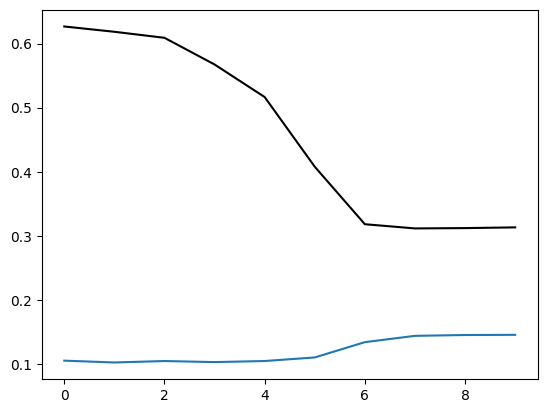

In [27]:
#PART (i): 
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
from codes.Regression import Regression
L = [0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

print("|index\t|lambda\t|loss train \t\t|loss test\t\t|")
for i in range(0,10):
    regression = Regression(m=10, reg_param=L[i])
    w = regression.closed_form(X_train, y_train)
    
    y_pred = regression.predict(X_train)
    loss_train= np.sum(np.power(y_pred - y_train, 2))/len(y_train)
    train_loss[i] = loss_train

    y_pred = regression.predict(X_test)
    loss_test = np.sum(np.power(y_pred - y_test, 2))/len(y_test)
    test_loss[i] = loss_test

    print(f"|{i+1}\t|{L[i]}\t|{loss_train}\t|{loss_test}\t|")
    #print(w.squeeze())

    
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

plt.plot(train_loss)
plt.plot(test_loss, color='black')
plt.show()

In [28]:
i = 0
print(lh[(i*10):(i*10 +10)])


NameError: name 'lh' is not defined